In [2]:
# Thu Vien
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
import statistics
from recommenders.utils.timer import Timer
from recommenders.datasets import movielens
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.neighbors import KNeighborsRegressor

c:\Users\USER\.conda\envs\recommenders-env\lib\site-packages\pandera\_pandas_deprecated.py:157: FutureWarning: Importing pandas-specific classes and functions from the
top-level pandera module will be **removed in a future version of pandera**.
If you're using pandera to validate pandas objects, we highly recommend updating
your import:

```
# old import
import pandera as pa

# new import
import pandera.pandas as pa
```

If you're using pandera to validate objects from other compatible libraries
like pyspark or polars, see the supported libraries section of the documentation
for more information on how to import pandera:

https://pandera.readthedocs.io/en/stable/supported_libraries.html

To disable this warning, set the environment variable:

```
export DISABLE_PANDERA_IMPORT_WARNING=True
```

  warnings.warn(_future_warning, FutureWarning)


In [3]:
# Load du lieu movieLens 100k
df = movielens.load_pandas_df(
    size="100k",
    header=["userId", "movieId", "rating", "timestamp"]
)
df = df[["userId", "movieId", "rating"]] # Chon 3 cot userId, movieId, rating
df.head()

100%|██████████| 4.81k/4.81k [00:13<00:00, 345KB/s]  


,userId,movieId,rating
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0


In [4]:
# Encode userId và movieId
user_enc = LabelEncoder()
item_enc = LabelEncoder()
df["userId_enc"] = user_enc.fit_transform(df["userId"])
df["movieId_enc"] = item_enc.fit_transform(df["movieId"])

In [5]:
# Xáo trộn dữ liệu
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [6]:
#Chuẩn bị dữ liệu X và y
X = df[['userId_enc', 'movieId_enc']]
y = df['rating']

In [7]:
# Chuẩn hóa dữ liệu
scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X)
df_standard = pd.DataFrame(X_standard, columns=["userId_enc", "movieId_enc"])
print("\nDu lieu sau khi chuan hoa Z-score:")
print(df_standard.head())


Du lieu sau khi chuan hoa Z-score:
   userId_enc  movieId_enc
0   -0.999519    -0.554812
1   -1.037026    -0.373432
2   -1.652150    -0.146707
3   -0.819482    -1.132206
4   -1.112041    -0.240420


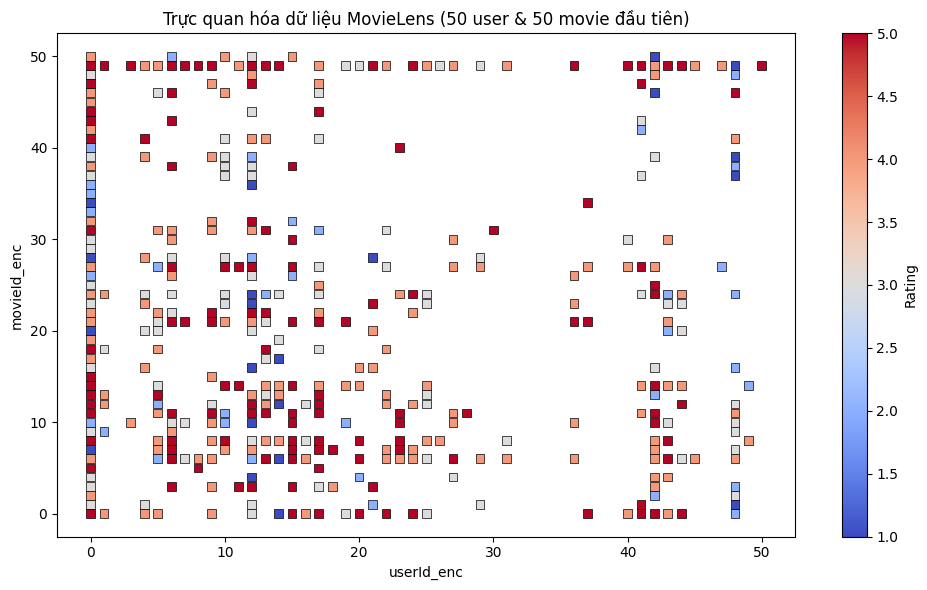

In [19]:
import matplotlib.pyplot as plt

# Lọc dữ liệu: chỉ lấy 50 userId_enc và 50 movieId_enc đầu tiên
filtered_df = df[
    (df['userId_enc'] <= 50) &
    (df['movieId_enc'] <= 50)
]

# Vẽ scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['userId_enc'], filtered_df['movieId_enc'],
            c=filtered_df['rating'], cmap='coolwarm', s=40, marker='s', edgecolors='black',
    linewidths=0.5)
plt.colorbar(label='Rating')
plt.title("Trực quan hóa dữ liệu MovieLens (50 user & 50 movie đầu tiên)")
plt.xlabel("userId_enc")
plt.ylabel("movieId_enc")
plt.tight_layout()
plt.show()


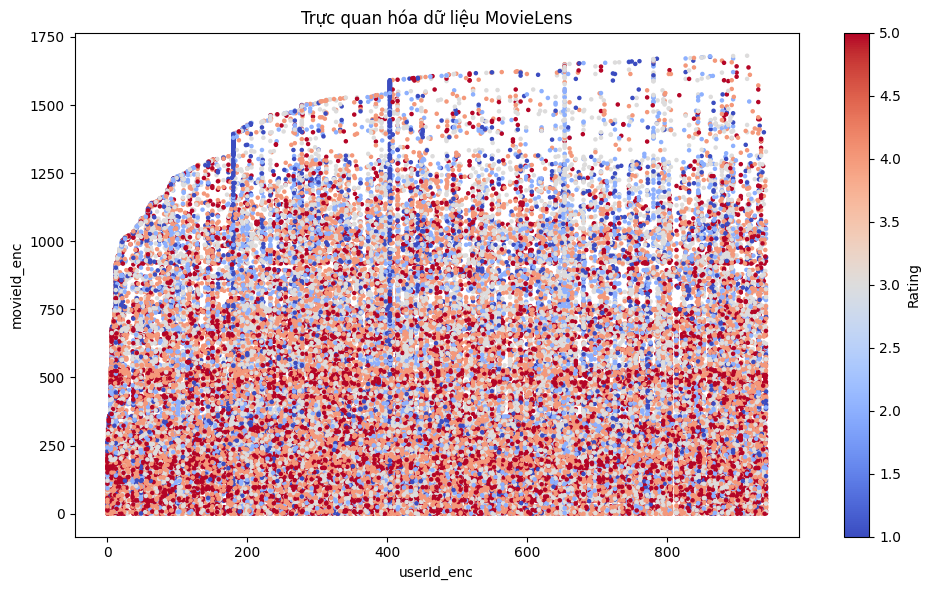

In [22]:
# Trực quan hóa dữ liệu
plt.figure(figsize=(10, 6))
plt.scatter(df['userId_enc'], df['movieId_enc'], c=df['rating'], cmap='coolwarm', s=5)
plt.colorbar(label='Rating')
plt.title("Trực quan hóa dữ liệu MovieLens")
plt.xlabel("userId_enc")
plt.ylabel("movieId_enc")
plt.tight_layout()
plt.show()



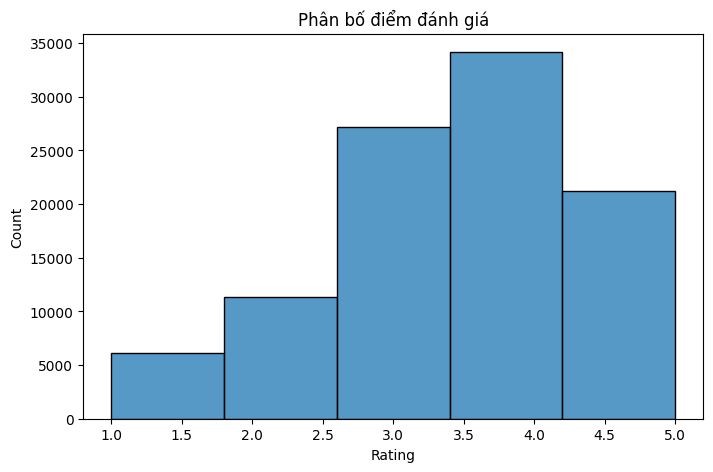

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ phân bố điểm đánh giá
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=5, kde=False)  # bins=5 vì rating 1-5
plt.title("Phân bố điểm đánh giá")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [ ]:
# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

# Huấn luyện mô hình
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE  = {mae:.4f}")
print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")

MAE  = 0.8942
MSE  = 1.2623
RMSE = 1.1235


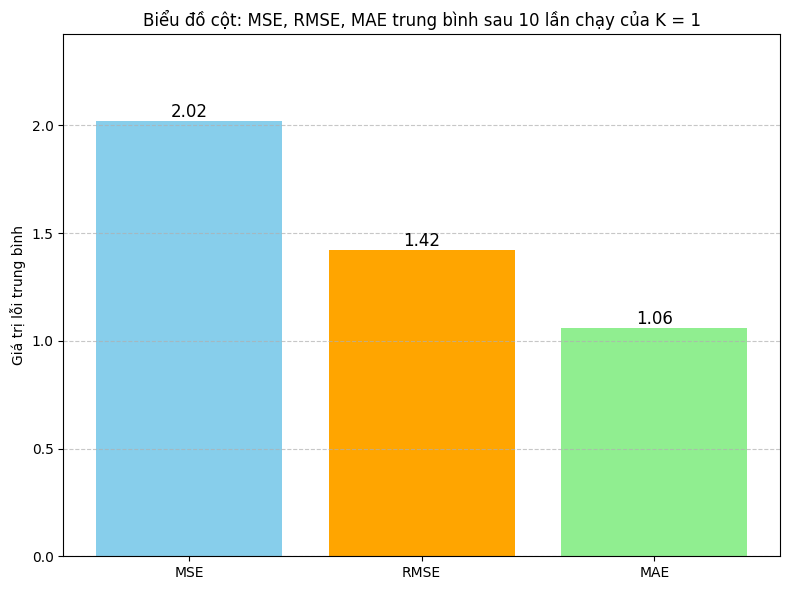

k = 1
Train Time: 0.2758819341659546
Test Time: 0.25931577682495116
Trung binh: RMSE = 1.4206 | MAE = 1.0601 | MSE = 2.0182


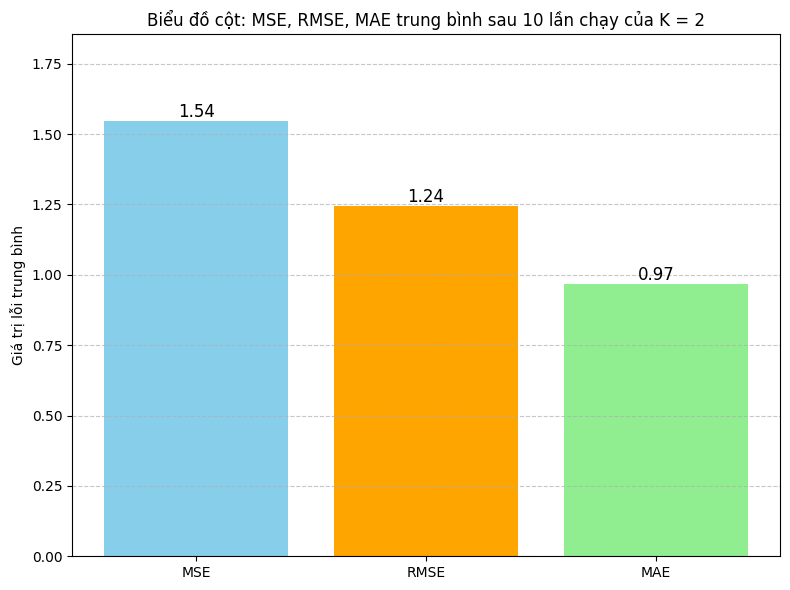

k = 2
Train Time: 0.26332099437713624
Test Time: 0.2771507978439331
Trung binh: RMSE = 1.2429 | MAE = 0.9682 | MSE = 1.5448


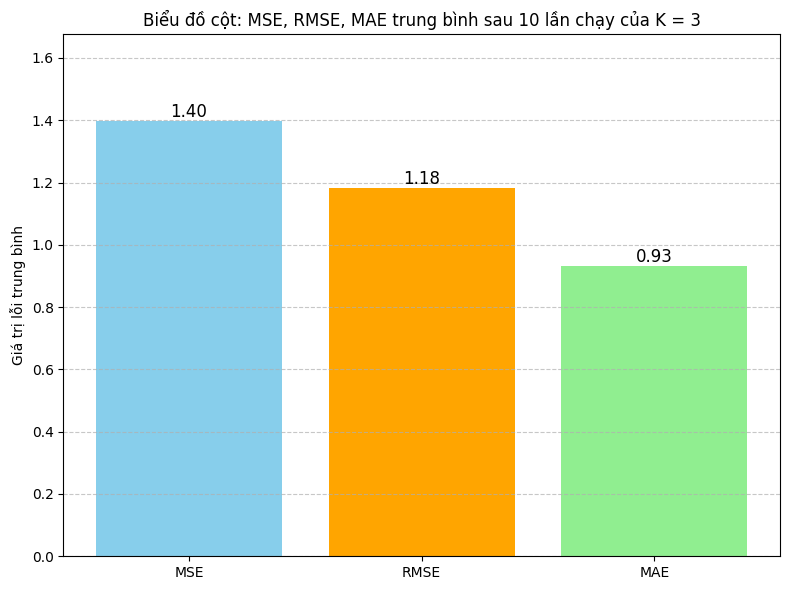

k = 3
Train Time: 0.2907196283340454
Test Time: 0.2983645677566528
Trung binh: RMSE = 1.1817 | MAE = 0.9330 | MSE = 1.3964


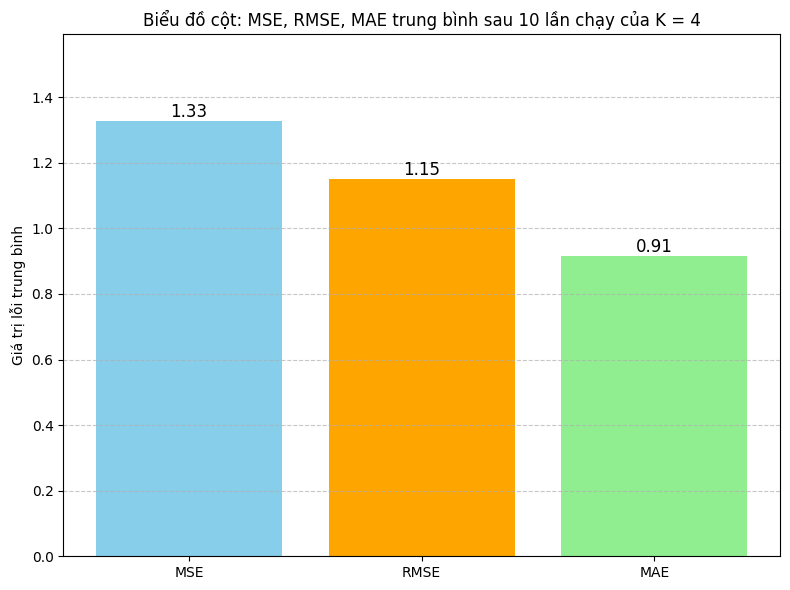

k = 4
Train Time: 0.2146601438522339
Test Time: 0.4073650360107422
Trung binh: RMSE = 1.1515 | MAE = 0.9147 | MSE = 1.3260


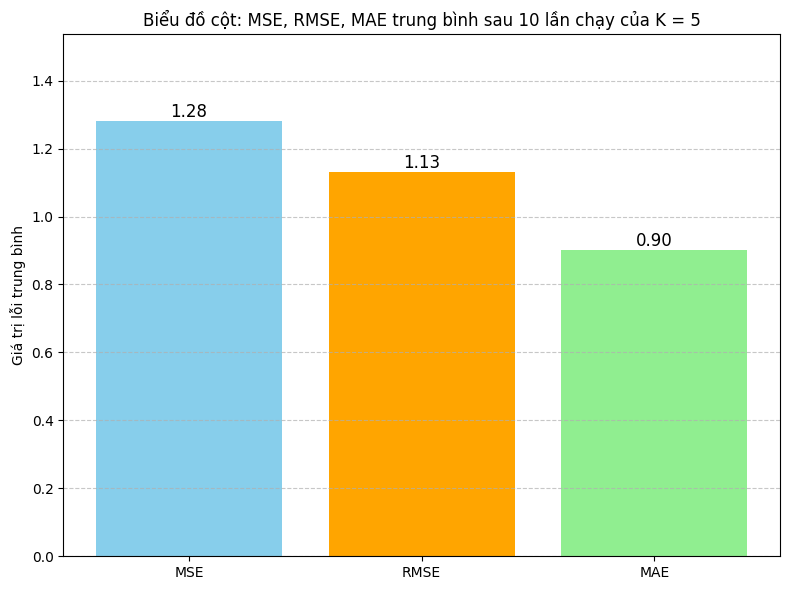

k = 5
Train Time: 0.06598236560821533
Test Time: 0.08184249401092529
Trung binh: RMSE = 1.1314 | MAE = 0.9013 | MSE = 1.2800


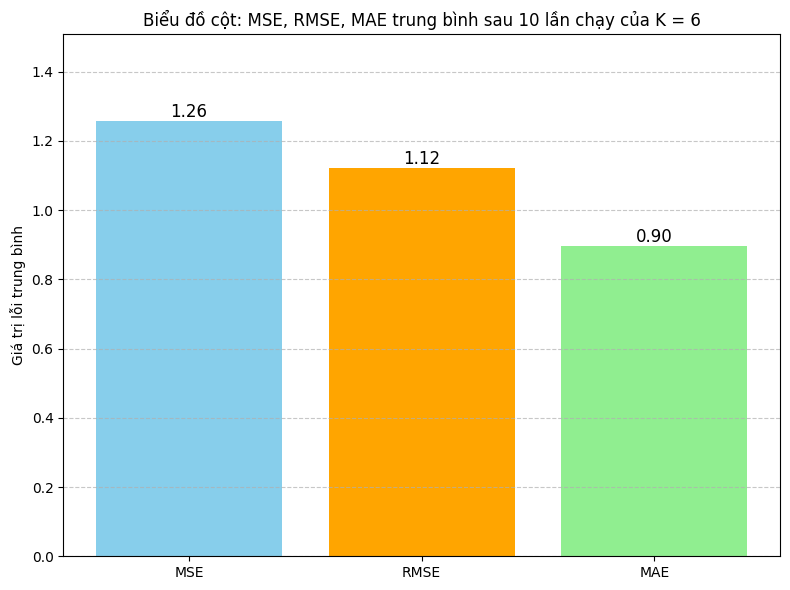

k = 6
Train Time: 0.0588552713394165
Test Time: 0.07070071697235107
Trung binh: RMSE = 1.1209 | MAE = 0.8951 | MSE = 1.2565


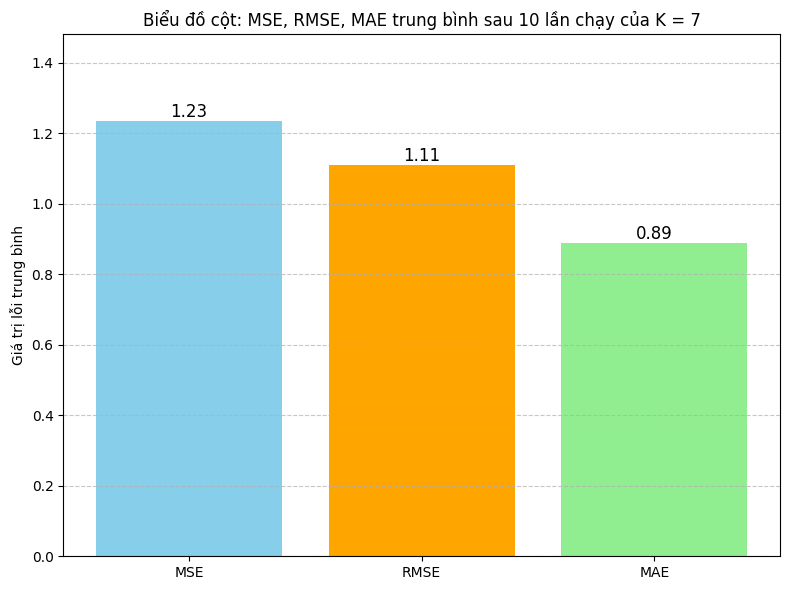

k = 7
Train Time: 0.05885741710662842
Test Time: 0.07269043922424316
Trung binh: RMSE = 1.1109 | MAE = 0.8890 | MSE = 1.2341


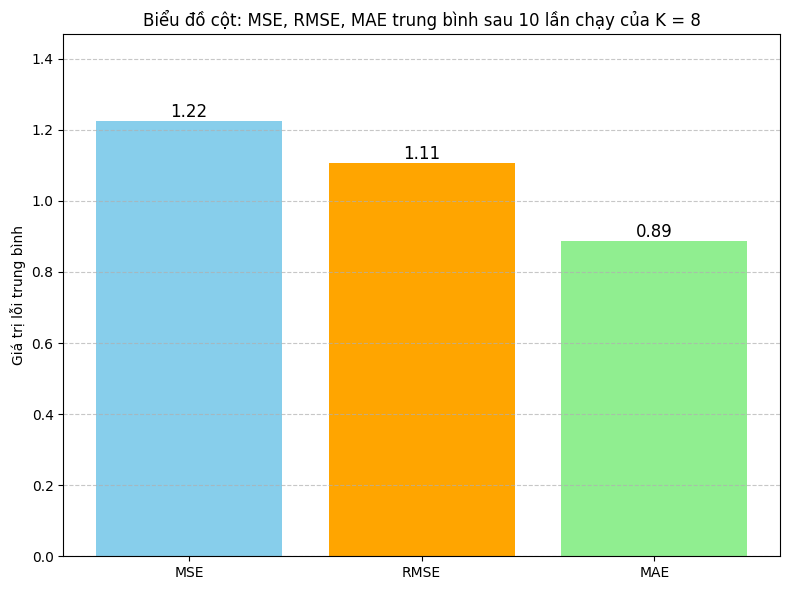

k = 8
Train Time: 0.2220780849456787
Test Time: 0.40003132820129395
Trung binh: RMSE = 1.1062 | MAE = 0.8864 | MSE = 1.2236


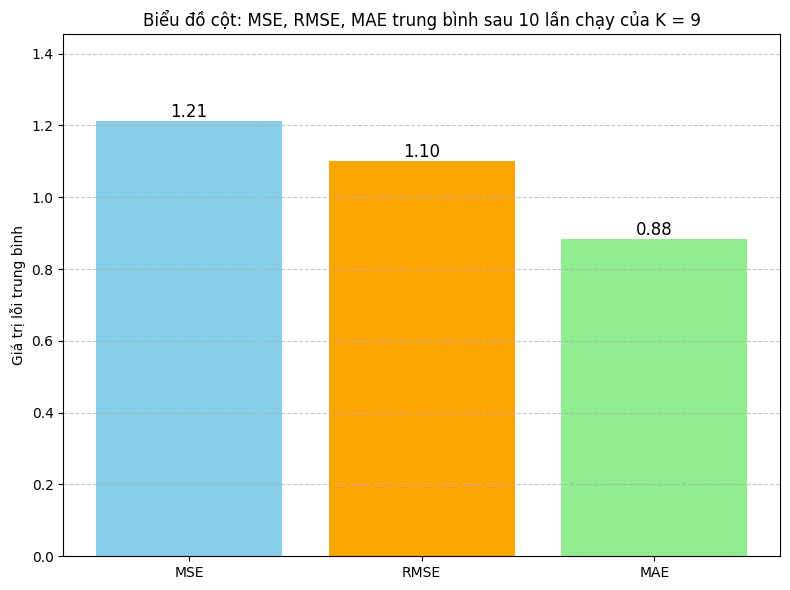

k = 9
Train Time: 0.16781694889068605
Test Time: 0.24315929412841797
Trung binh: RMSE = 1.1005 | MAE = 0.8824 | MSE = 1.2111


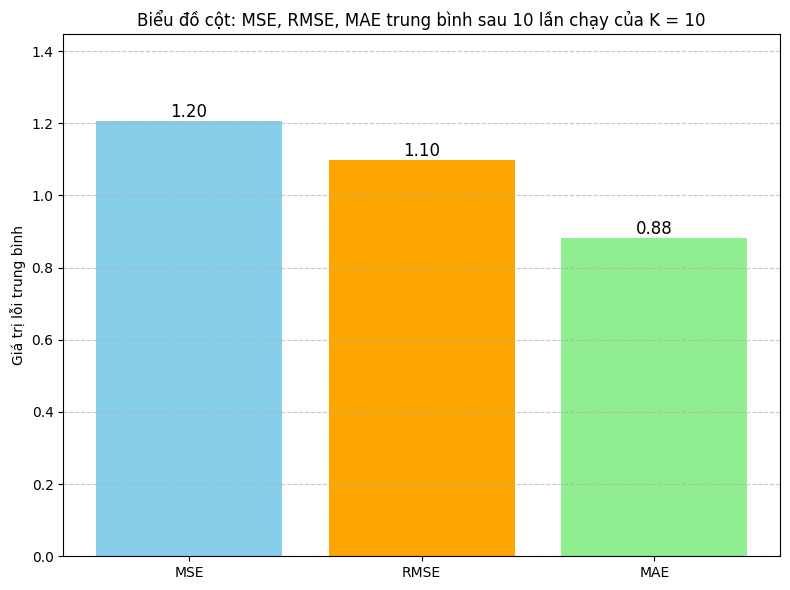

k = 10
Train Time: 0.137208890914917
Test Time: 0.1867586851119995
Trung binh: RMSE = 1.0977 | MAE = 0.8809 | MSE = 1.2050


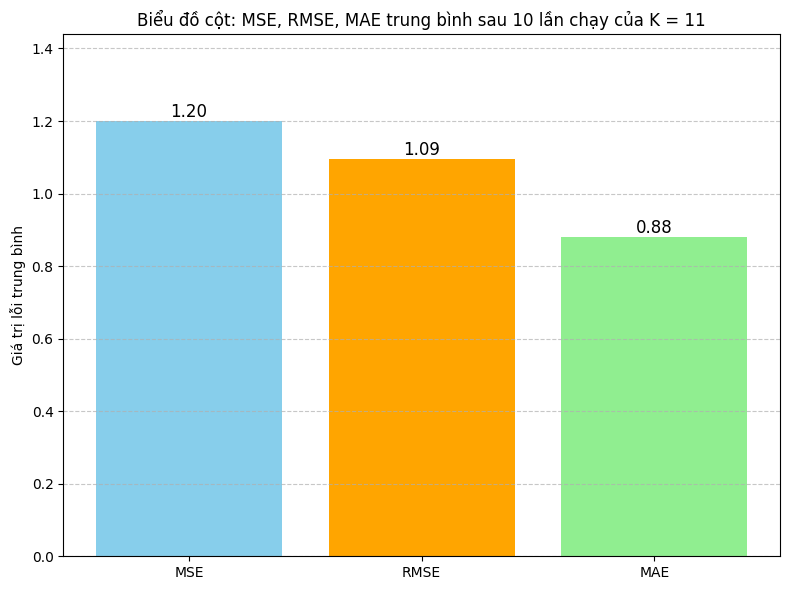

k = 11
Train Time: 0.10910415649414062
Test Time: 0.3525919675827026
Trung binh: RMSE = 1.0950 | MAE = 0.8795 | MSE = 1.1990


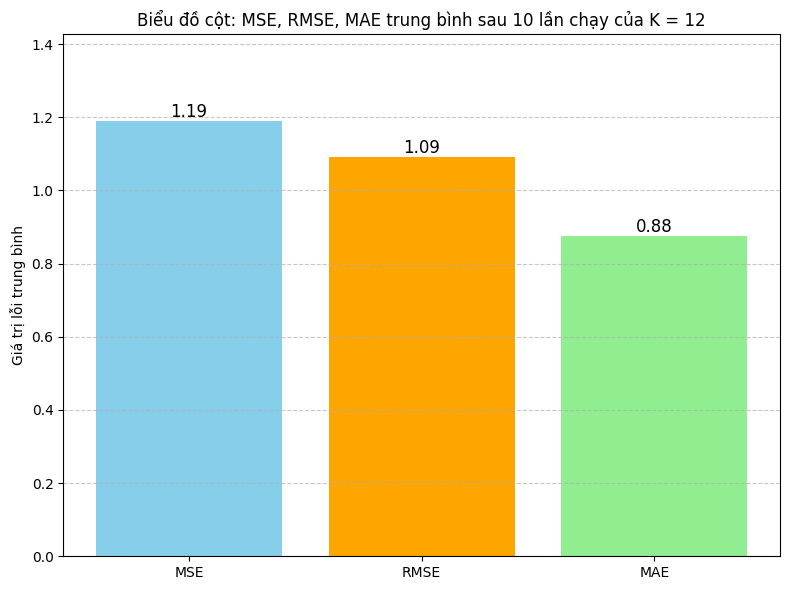

k = 12
Train Time: 0.1263890027999878
Test Time: 0.2114018201828003
Trung binh: RMSE = 1.0902 | MAE = 0.8759 | MSE = 1.1886


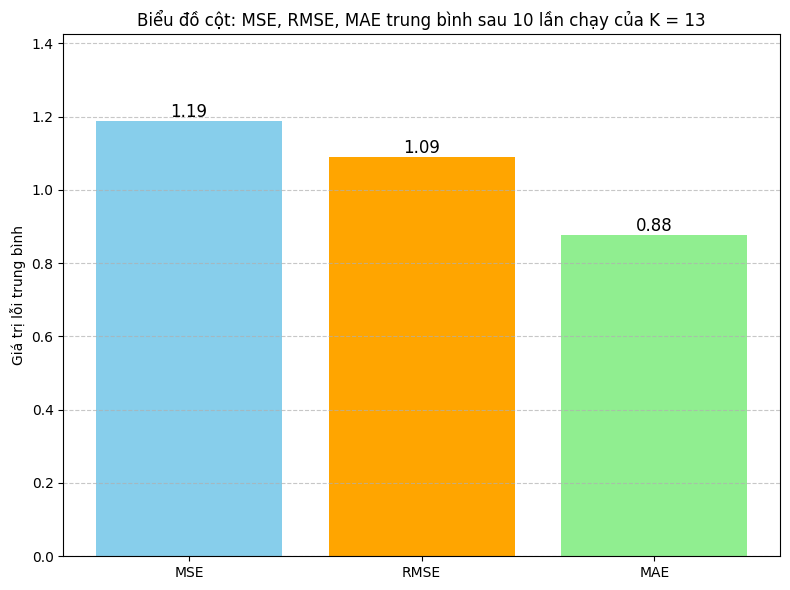

k = 13
Train Time: 0.16846852302551268
Test Time: 0.31070311069488527
Trung binh: RMSE = 1.0894 | MAE = 0.8758 | MSE = 1.1869


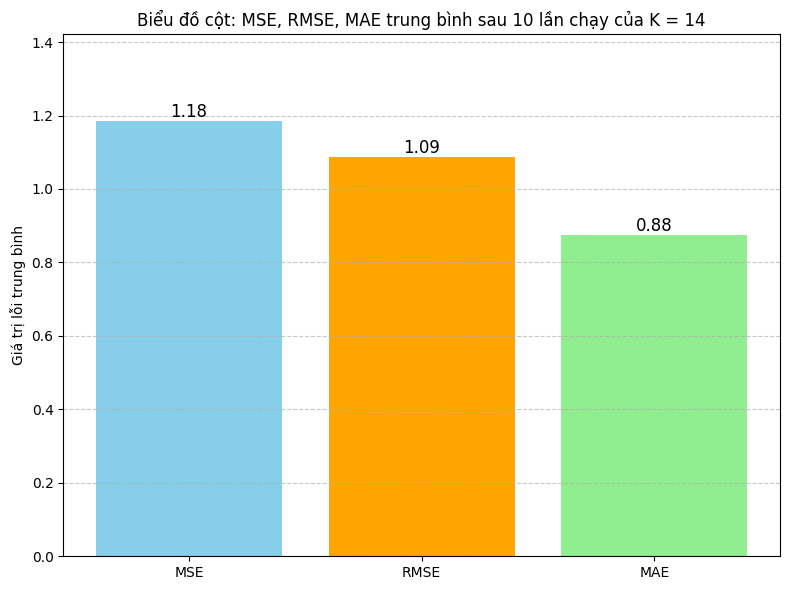

k = 14
Train Time: 0.11715846061706543
Test Time: 0.26040360927581785
Trung binh: RMSE = 1.0881 | MAE = 0.8757 | MSE = 1.1840


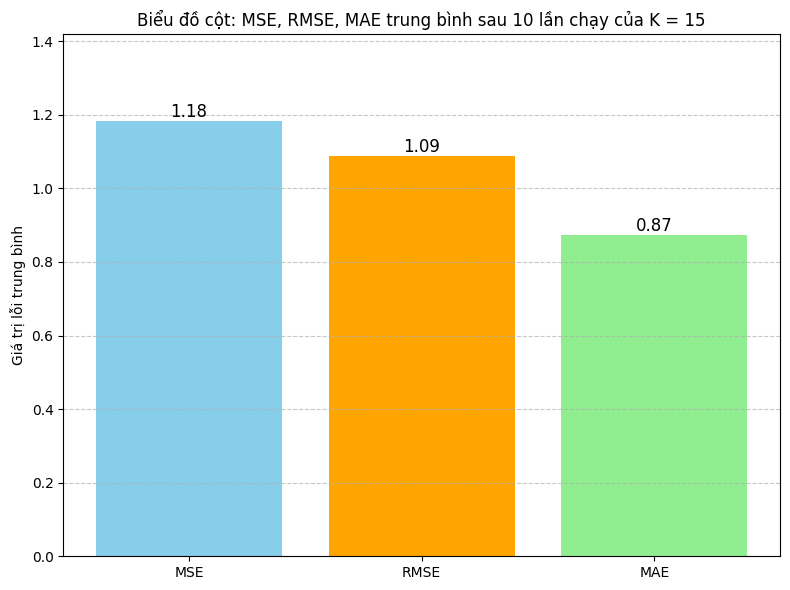

k = 15
Train Time: 0.06784324645996094
Test Time: 0.21893055438995362
Trung binh: RMSE = 1.0872 | MAE = 0.8743 | MSE = 1.1820


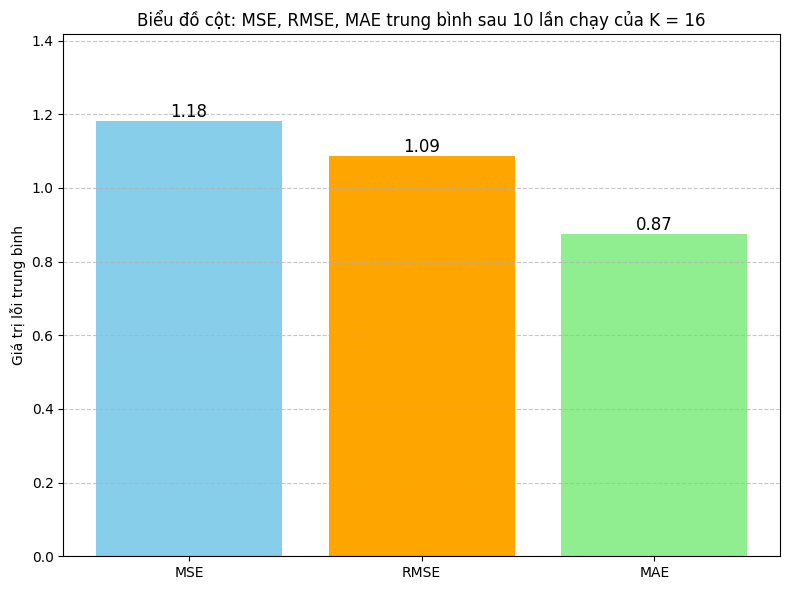

k = 16
Train Time: 0.056062054634094236
Test Time: 0.11949293613433838
Trung binh: RMSE = 1.0865 | MAE = 0.8744 | MSE = 1.1805


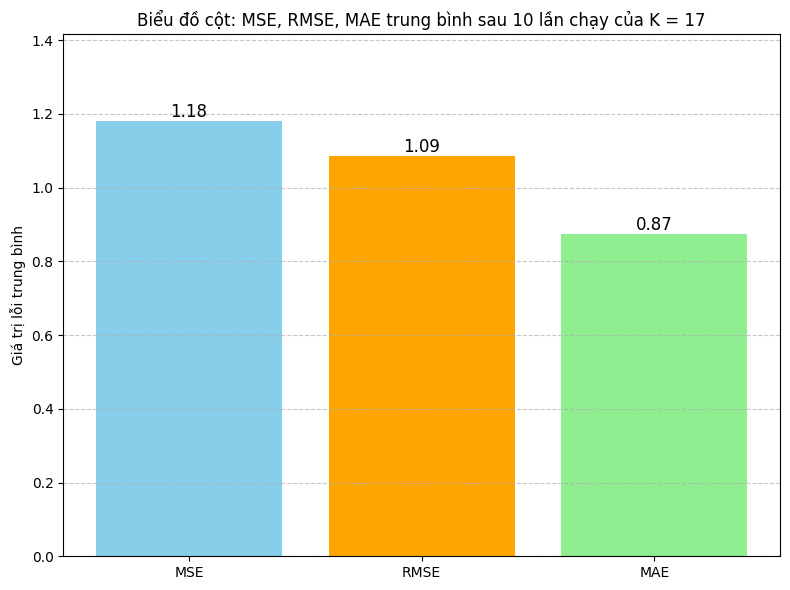

k = 17
Train Time: 0.19313790798187255
Test Time: 0.3841679811477661
Trung binh: RMSE = 1.0862 | MAE = 0.8741 | MSE = 1.1798


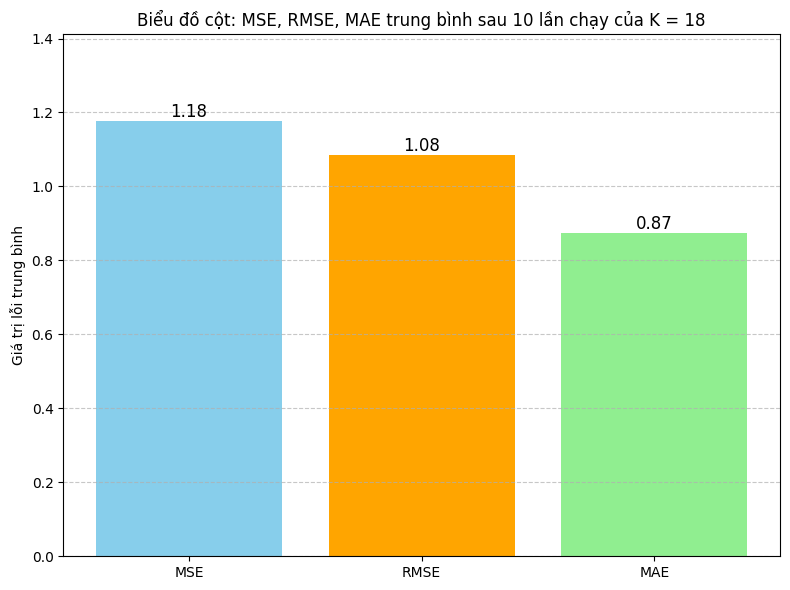

k = 18
Train Time: 0.0770247220993042
Test Time: 0.26220035552978516
Trung binh: RMSE = 1.0844 | MAE = 0.8735 | MSE = 1.1759


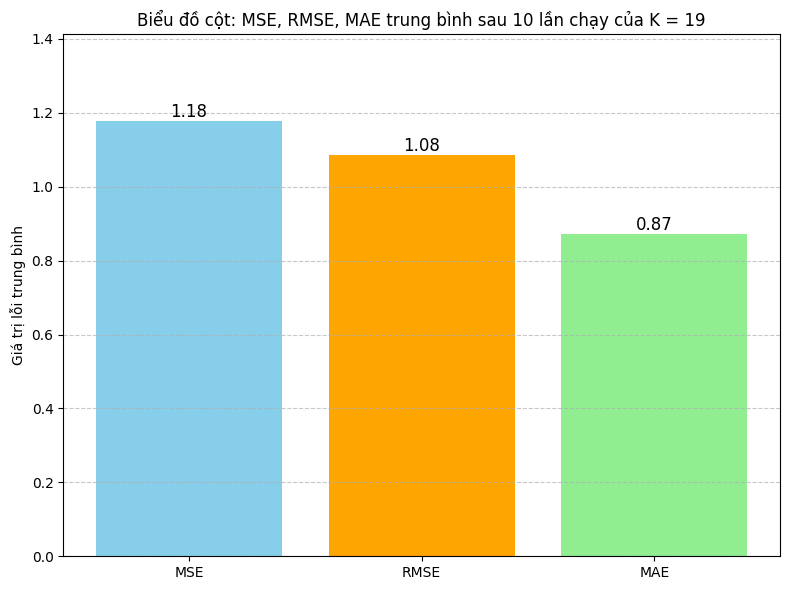

k = 19
Train Time: 0.05758554935455322
Test Time: 0.1285541296005249
Trung binh: RMSE = 1.0848 | MAE = 0.8733 | MSE = 1.1769


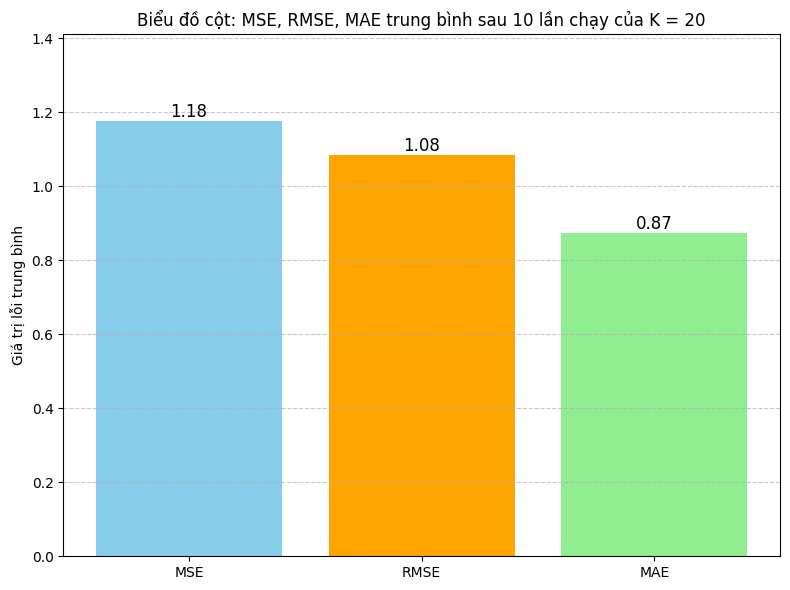

k = 20
Train Time: 0.05392138957977295
Test Time: 0.1235208511352539
Trung binh: RMSE = 1.0840 | MAE = 0.8736 | MSE = 1.1752


In [24]:
import time
results = []
for k_neighbor in range(1, 21):
    time_train = []
    time_test = []
    rmse_list = []
    mae_list = []
    mse_list = []
    for each in range(1, 11):  # Chạy 10 lần thử nghiệm
        combined = list(zip(X.values, y.values))
        # combined = list(zip(X, y))
        random.shuffle(combined)
        dulieu_X_shuffled, dulieu_Y_shuffled = zip(*combined)
        X_Train, X_Test, Y_Train, Y_Test = train_test_split(dulieu_X_shuffled, dulieu_Y_shuffled, test_size=1/3, random_state=125)

        # Huấn luyện mô hình KNN
        st = time.time()
        model = KNeighborsRegressor(n_neighbors=k_neighbor)
        model.fit(X_Train, Y_Train)
        et = time.time() - st
        time_train.append(et)

        # Dự đoán và tính toán thời gian
        st = time.time()
        Y_Pred = model.predict(X_Test)
        et = time.time() - st
        time_test.append(et)

      
        knn_mse = mean_squared_error(Y_Test, Y_Pred)
        mse_list.append(knn_mse)
        knn_rmse = np.sqrt(knn_mse)
        rmse_list.append(knn_rmse)
        knn_mae = mean_absolute_error(Y_Test, Y_Pred)
        mae_list.append(knn_mae)
        # print(f"MSE cho k={k_neighbor} là: {knn_mse}")

    # iterations = np.arange(1, 11)
    # plt.figure(figsize=(10, 6))
    # plt.plot(iterations, rmse_list, marker='o', label='RMSE')
    # plt.plot(iterations, mae_list, marker='s', label='MAE')
    # plt.plot(iterations, mse_list, marker='^', label='MSE')
    # plt.xlabel('Lần lặp')
    # plt.ylabel('Giá trị')
    # plt.title('Biểu đồ RMSE, MAE, MSE qua 10 lần lặp của K = '+str(k_neighbor))
    # plt.legend()
    # plt.grid(True)
    # plt.show()
    

    # Tính trung bình thời gian train, test và MSE
    Ketqua_timeTrain = statistics.mean(time_train)
    Ketqua_timeTest = statistics.mean(time_test)

    Ketqua_mse = statistics.mean(mse_list)
    Ketqua_rmse = statistics.mean(rmse_list)
    Ketqua_mae = statistics.mean(mae_list)
    results.append((k_neighbor, Ketqua_mse, Ketqua_rmse, Ketqua_mae))

    # Vẽ biểu đồ cột
    metrics = ['MSE', 'RMSE', 'MAE']
    values = [Ketqua_mse, Ketqua_rmse, Ketqua_mae]

    plt.figure(figsize=(8, 6))
    bars = plt.bar(metrics, values, color=['skyblue', 'orange', 'lightgreen'])

    # Hiển thị giá trị trên đầu cột
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                f'{height:.2f}', ha='center', va='bottom', fontsize=12)

    plt.ylabel('Giá trị lỗi trung bình')
    plt.title('Biểu đồ cột: MSE, RMSE, MAE trung bình sau 10 lần chạy của K = '+str(k_neighbor))
    plt.ylim(0, max(values) * 1.2)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print(f"k = {k_neighbor}")
    print(f"Train Time: {Ketqua_timeTrain}")
    print(f"Test Time: {Ketqua_timeTest}")
    print(f"Trung binh: RMSE = {Ketqua_rmse:.4f} | MAE = {Ketqua_mae:.4f} | MSE = {Ketqua_mse:.4f}")

    



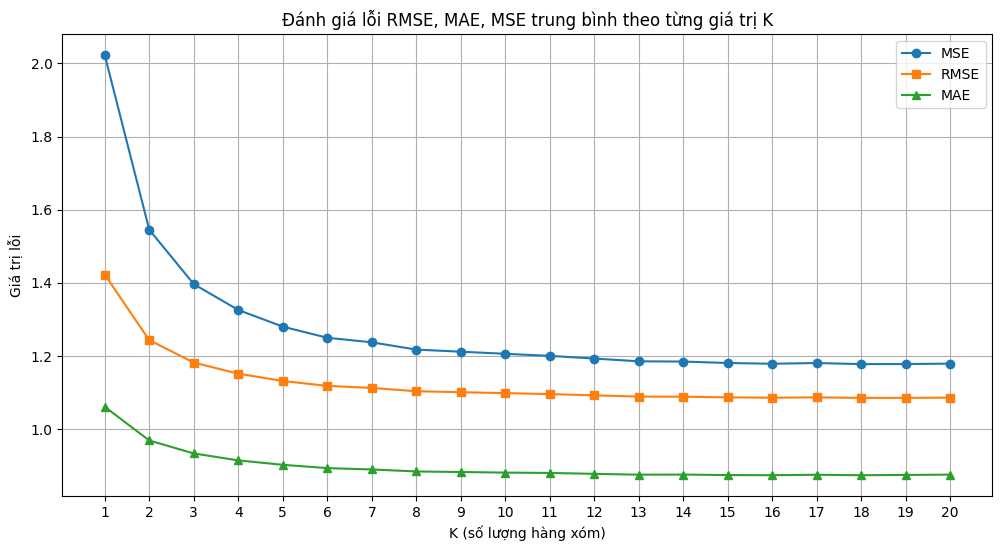

In [12]:

# Tách các giá trị để vẽ biểu đồ
ks = [r[0] for r in results]
mses = [r[1] for r in results]
rmses = [r[2] for r in results]
maes = [r[3] for r in results]

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))

plt.plot(ks, mses, marker='o', label='MSE')
plt.plot(ks, rmses, marker='s', label='RMSE')
plt.plot(ks, maes, marker='^', label='MAE')

plt.title("Đánh giá lỗi RMSE, MAE, MSE trung bình theo từng giá trị K")
plt.xlabel("K (số lượng hàng xóm)")
plt.ylabel("Giá trị lỗi")
plt.xticks(ks)
plt.grid(True)
plt.legend()
plt.show()


In [17]:
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Luu mo hinh thanh cong")

Luu mo hinh thanh cong
